#Análisis de la importancia del tamaño de la Tolva para la alimentación de la extruora

Al intentar conseguir un modelo matemático de la extrusora para intentar cerrar el lazo mediante un PID, se ha comprobado que el sistema en lazo abierto no es lo suficientemente estable y el throughput de la extrusora no es constante. Una hipótesis que se tiene es que la alimentación de la granza en el extrusor no es del todo constante. Por ello una solución que se propone es la de intentar que la alimentación sea constante.

Se diseña una tolva que permita meter más granza para comprobar si el peso que ejerce la propia granza en la entrada del alimentador puede ser una posible solución.

La tolva diseñada permite introducir hasta un máximo de $150gr$ frente a los $42gr$ de la tolva de serie. Se va a hacer una producción en la que se va a muestrear los datos obtenidos para su posterior análisis.


In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [188]:
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [219]:
#Abrimos los ficheros con los datos de las pruebas
#Tolva pequeña
data_p1 = pd.read_csv('prueba1.CSV')
#Tolva Graned
data_p2 = pd.read_csv('prueba2.CSV')

In [220]:
#El ensayo se realizo a distintas velocidades, se filtran los datos por
#velocidad rápida= v1 = 4.42mm/s
#velocidad lenta= v2 = 3.816mm/s
#Filtramos los datos con velocidad de tracción rápida
data_p1_v1 = data_p1[(data_p1['RPM TRAC'] >= 4) & (data_p1['RPM TRAC'] <= 4.42)]
data_p2_v1 = data_p2[(data_p2['RPM TRAC'] >= 4) & (data_p2['RPM TRAC'] <= 4.42)]
#Filtramos los datos con velocidad de tracción lenta
data_p1_v2 = data_p1[(data_p1['RPM TRAC'] > 0) & (data_p1['RPM TRAC'] <= 3.816)]
data_p2_v2 = data_p2[(data_p2['RPM TRAC'] > 0) & (data_p2['RPM TRAC'] <= 3.816)]

,Tolva Grande,Tolva pequeña
count,2000.000000,2000.000000
mean,1.630594,1.558390
std,0.140171,0.153613
min,1.023350,0.010000
25%,1.562434,1.460000
50%,1.642723,1.550000
75%,1.711542,1.630000
max,2.204747,2.400000


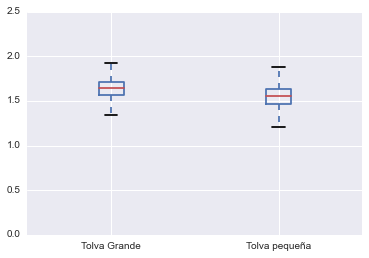

In [235]:
#d ={'Tolva pequeña V1':data_p1_v1.ix[:,"Diametro X"],'Tolva Grande V1':data_p2_v1.ix[:,"Diametro X"],'Tolva pequeña V2':data_p1_v2.ix[:,"Diametro X"],'Tolva Grande V2':data_p2_v2.ix[:,"Diametro X"]}
d ={'Tolva pequeña':data_p1.ix[:,"Diametro X"],'Tolva Grande':data_p2.ix[:,"Diametro X"]}
da = pd.DataFrame(data=d)
da.boxplot(return_type='axes',figsize=(0,0))
da.describe()

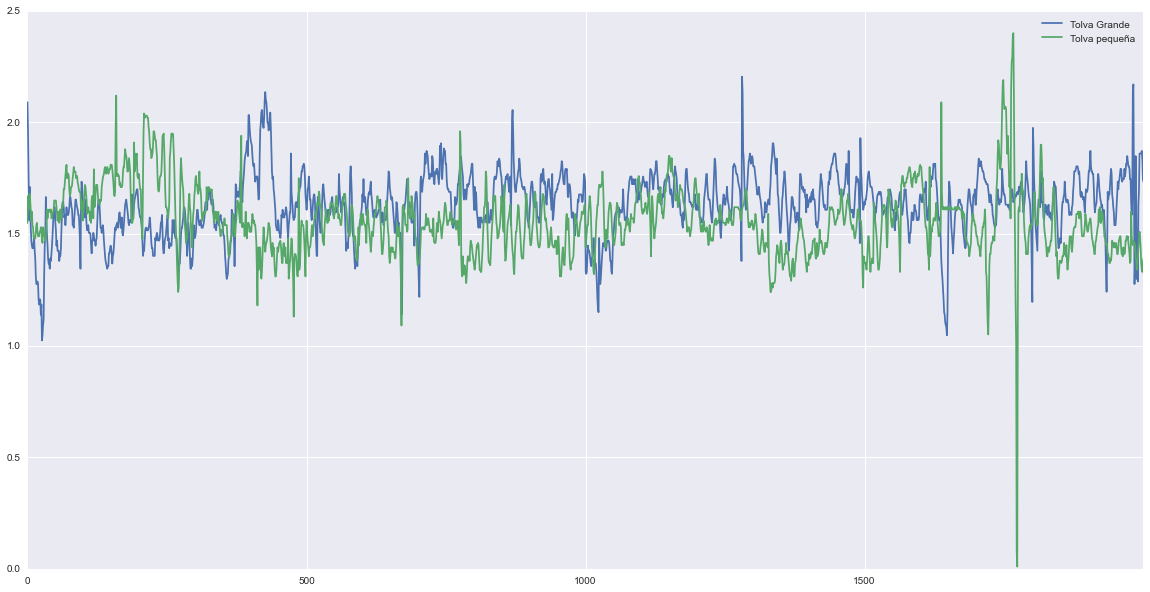

In [236]:
da.plot(figsize=(20,10))

Histrogram of the ratio

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x098B62D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x097B4D90>]], dtype=object)

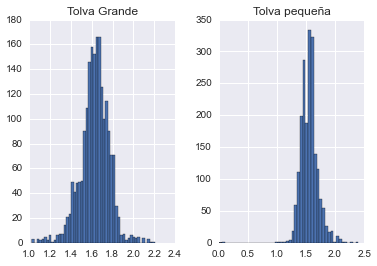

In [237]:
da.hist(bins=50)

In [19]:
data_filtered[columns].corr()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,VELOCIDAD
Tmp Husillo,1.000000,0.216891,0.245555,0.336489,0.394231
Tmp Nozzle,0.216891,1.000000,0.170572,0.148273,0.240967
Diametro X,0.245555,0.170572,1.000000,0.679199,0.252167
Diametro Y,0.336489,0.148273,0.679199,1.000000,0.244315
VELOCIDAD,0.394231,0.240967,0.252167,0.244315,1.000000


# Calulating Limit Violations

Here we will check wether the diameter of the filament passes certain queality thresholds. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [20]:
Th_u = 1.85
Th_d = 1.65

In [21]:
data_violations = data[(data['Diametro X'] > Th_u) | (data['Diametro X'] < Th_d) |
                       (data['Diametro Y'] > Th_u) | (data['Diametro Y'] < Th_d)]

In [22]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,VELOCIDAD
count,1271.000000,1271.000000,1271.000000,1271.000000,1271,1271,1271.000000
mean,63.406137,134.549017,1.573344,1.524330,1,0.2171518,1.114752
std,1.073185,1.541764,0.625175,0.651855,0,0.4124691,0.486605
min,61.500000,129.400000,0.014000,0.000342,True,False,0.000000
25%,62.500000,134.100000,1.505085,1.494436,1,0,0.750000
50%,63.500000,134.700000,1.780362,1.747282,1,0,0.750000
75%,64.100000,135.400000,1.975350,1.942664,1,0,1.500000
max,66.600000,139.000000,2.491494,2.310441,True,True,2.500000


array([<matplotlib.axes.AxesSubplot object at 0x10bdbbb10>,
       <matplotlib.axes.AxesSubplot object at 0x10c79a510>], dtype=object)

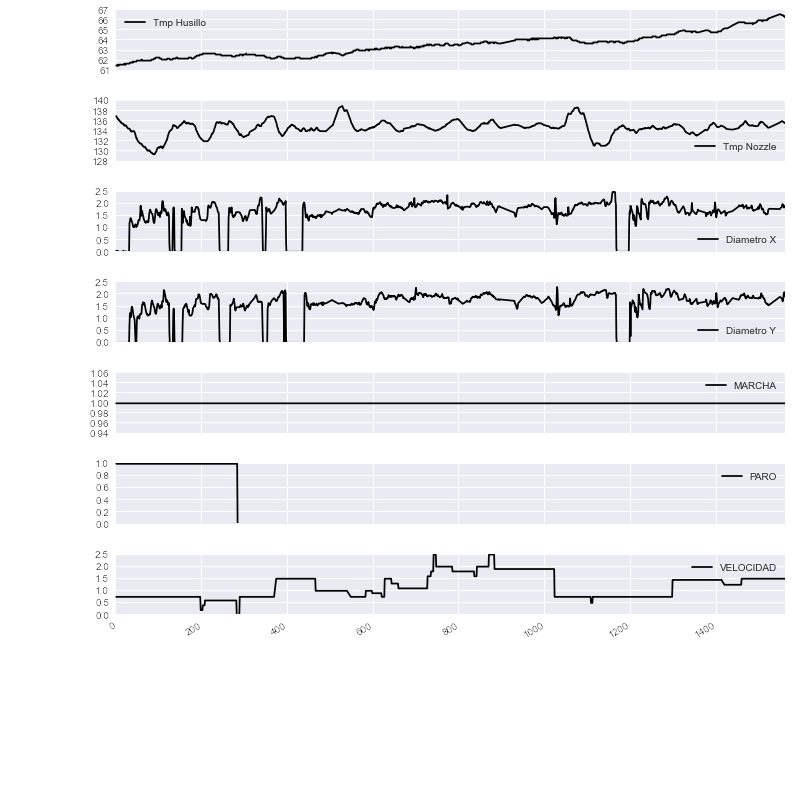

In [23]:
data_violations.plot(subplots=True, figsize=(12,12))